## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**

- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects  (if k value is 2 then visual apperence in 2 colors)
  
- We will try to extract the most dominant 'K' Colors using K-Means
  
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation
  
<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [5]:
pip install Opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

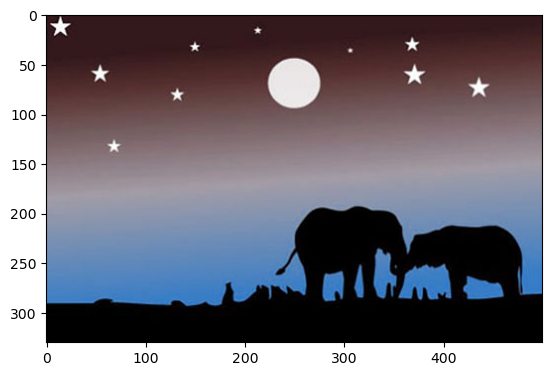

In [9]:
img = cv2.imread('elephant.jpg')
plt.imshow(img)


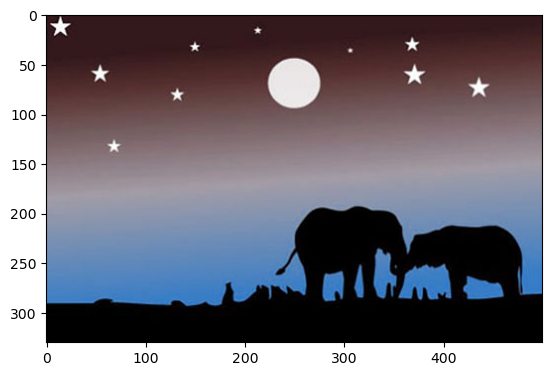

In [41]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
orginal_img=img
plt.imshow(img)

In [42]:
print(img.shape)

(330, 500, 3)


In [43]:
# flatten each channel of the image in linear array

all_pixels=img.reshape((330*500,3))
print(all_pixels.shape)

(165000, 3)


In [44]:
# one linear array for each color, (red , green , and blue channel) ie here i apply kmeans for abstracting most dominant colors in the whole image

In [45]:
from sklearn.cluster import KMeans

In [46]:
dominant_color=4
km=KMeans(dominant_color)
km.fit(all_pixels)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [47]:
centers=km.cluster_centers_
#print(centers)

In [48]:
centers=np.array(centers,dtype='uint8')

In [49]:
print(centers)

[[128 145 174]
 [ 64  35  38]
 [  1   0   1]
 [118  95  99]]


# plot all colors

In [50]:
#run this you can clearly visualize plot bar chart

# i=1
# for each_col in centers:
#     plt.subplot(1,4,i)
#     i+=1

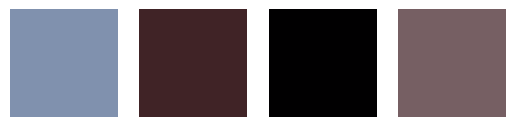

In [51]:
i=1
colors=[]

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off') ###
    i+=1
    
    colors.append(each_col)
    
    # color swatch 
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()

# Segmenting Our Original Image

In [52]:
# np.zeros?
new_img = np.zeros((330*500, 3), dtype='uint8')

print(new_img.shape)

(165000, 3)


In [53]:
colors

[array([128, 145, 174], dtype=uint8),
 array([64, 35, 38], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([118,  95,  99], dtype=uint8)]

In [54]:
a=km.labels_
print(a)
print(len(a))

[1 1 1 ... 2 2 2]
165000


In [57]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
# print(new_img.shape)
new_img=new_img.reshape((orginal_img.shape))


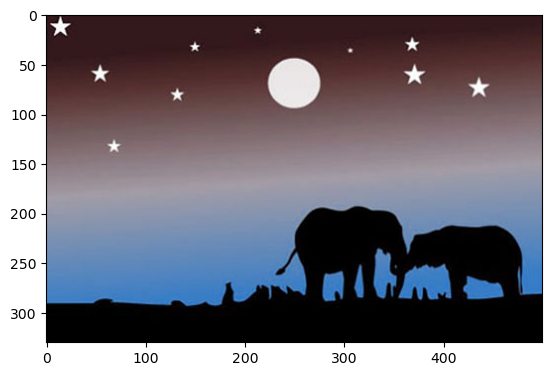

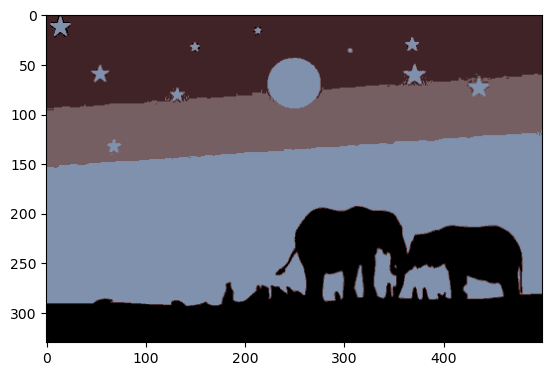

In [60]:
# compare the old and new img 

plt.imshow(orginal_img)
plt.show()

plt.imshow(new_img)
plt.show()
